- size, 
- Noise?
- color histogram

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
main_df = pd.read_csv("Image_classification_data/data_labels_mainData.csv", delimiter=",")
main_df

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [9]:
main_df.cellTypeName.value_counts()

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [10]:
main_df.isCancerous.value_counts()

0    5817
1    4079
Name: isCancerous, dtype: int64

In [3]:
extra_df = pd.read_csv("Image_classification_data/data_labels_extraData.csv")
extra_df

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [12]:
extra_df.isCancerous.value_counts()

0    7394
1    2990
Name: isCancerous, dtype: int64

kinda imbalanced dataset

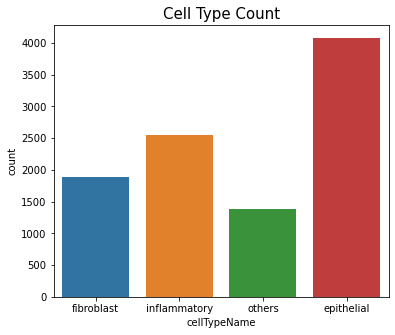

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(x=main_df.cellTypeName)
plt.title("Cell Type Count",fontsize=15)
plt.show()

In [14]:
main_df.isnull().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

<AxesSubplot:xlabel='cellTypeName', ylabel='count'>

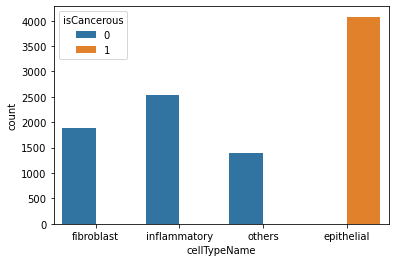

In [15]:
sns.countplot(x=main_df.cellTypeName, hue=main_df.isCancerous)

**Comments**: It's cancerous if its cell type is *epithelial*

# Split dataset into different folders for different classes

In [21]:
import shutil
root = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/"
source_dir = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/patch_images"
for i, row in main_df.iterrows():
    image_name = row["ImageName"]
    cell_name = row["cellTypeName"]
    is_cancer = str(row["isCancerous"])

    new_folder_multi = os.path.join(root, cell_name)
    new_folder_bin = os.path.join(root, is_cancer)

    # os.makedirs(new_folder_multi, exist_ok=True)
    os.makedirs(new_folder_bin, exist_ok=True)

    source = os.path.join(source_dir, image_name)

    # dest_multi = os.path.join(root, cell_name)
    dest_bin = os.path.join(root, is_cancer)

    # go = shutil.copy(source,dest_multi)
    go = shutil.copy(source, dest_bin)





In [ ]:
import shutil
root = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/"
source_dir = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/patch_images"

for i, row in extra_df.iterrows():
    image_name = row["ImageName"]
    is_cancer = str(row["isCancerous"])

    new_folder_bin = os.path.join(root, "extra",is_cancer)

    os.makedirs(new_folder_bin, exist_ok=True)

    source = os.path.join(source_dir, image_name)
    # print(image_name)
    dest_bin = os.path.join(root, is_cancer)

    go = shutil.copy(source, new_folder_bin)


In [28]:
path = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/multi-task"
dest = os.path.join(path, "others")
source = os.path.join(root, "others")

_ = shutil.move(source, dest)

# Display Images

Positive Class


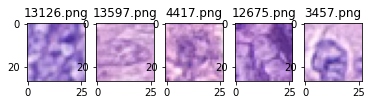

In [46]:
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
%matplotlib inline
# plt.figure(figsize=(20,20))
img_folder=r'Image_classification_data/binary-task/1'

def display_images(amount, img_folder):
    for i in range(amount):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,amount,i+1)
        ax.title.set_text(file)
        plt.imshow(img)
print("Positive Class")
display_images(5, img_folder)

Negative Class


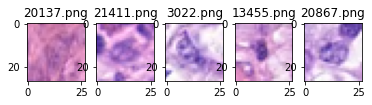

In [47]:
img_folder=r'Image_classification_data/binary-task/0'
print("Negative Class")
display_images(5, img_folder)

## Display Multiclass images

Epithelial


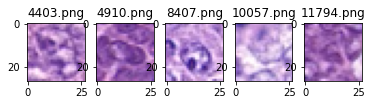

In [48]:
print("Epithelial")
display_images(5, "Image_classification_data/multi-task/epithelial")

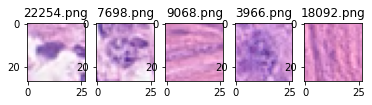

In [49]:
display_images(5, "Image_classification_data/multi-task/fibroblast")

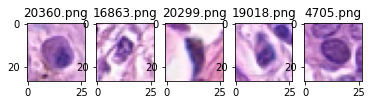

In [50]:
display_images(5, "Image_classification_data/multi-task/inflammatory")

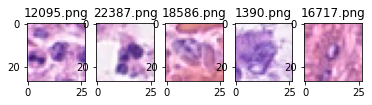

In [54]:
display_images(5, "Image_classification_data/multi-task/others")

# Data Loading

In [55]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    validation_split=0.2 # slit dataset into training and testing sets
)
multi_path = "Image_classification_data/multi-task"
img_height = 27
img_width = 27
BATCH_SIZE = 32

# load 
train_data = dataGen.flow_from_directory(
    directory=multi_path,
    target_size=(img_height, img_width),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    subset="training")

# load 
val_data = dataGen.flow_from_directory(
    directory=multi_path,
    target_size=(img_height, img_width),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    subset="validation")

Found 7919 images belonging to 4 classes.
Found 1977 images belonging to 4 classes.


In [8]:
import cv2
import matplotlib.image as mplib 
from PIL import Image
import numpy as np

def load_data(labelNames, root):    
    images = list()
    labels = list()
    
    for label in labelNames:
        # get image directory
        img_dir = os.path.join(root, f"{label}")
        
        for img in os.listdir(img_dir):
            img = np.array(Image.open(os.path.join(img_dir, img),'r'))
            images.append(img)
            labels.append(label)
        
    return (images, labels)

In [60]:
classes = ["epithelial","fibroblast","inflammatory","others"]
path = "/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/multi-task"
multi_data, multi_labels = load_data(classes, root=path)
np.asarray(multi_data).shape

(9896, 27, 27, 3)

In [9]:
classes = ["0","1"]
path = "/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/extra"
multi_data, multi_labels = load_data(classes, root=path)
np.asarray(multi_data).shape

(10384, 27, 27, 3)

# Data Augmentation

In [65]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import rgb_to_grayscale

dataGen = ImageDataGenerator(
    # zca_whitening=True,
)

grayX = rgb_to_grayscale(multi_data)

np_data = np.array(grayX).astype(int)
np_label = np.array(multi_labels)

dataGen.fit(np_data)


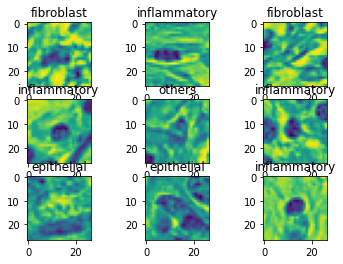

In [68]:
for X_batch, y_batch in dataGen.flow(np_data, np_label, batch_size=9):

    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
        plt.title(y_batch[i])
    # show the plot
    plt.show()
    break

## Rotation

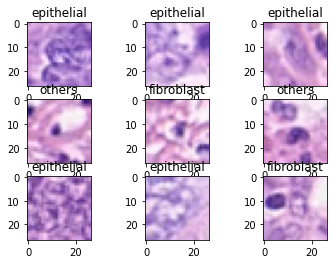

In [39]:
dataGen = ImageDataGenerator(
    rotation_range=90
)
# np_data = np.array(multi_data).astype(int)
# np_label = np.array(multi_labels)

dataGen.fit(np_data)
for X_batch, y_batch in dataGen.flow(np_data, np_label, batch_size=9):

    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
        plt.title(y_batch[i])
    # show the plot
    plt.show()
    break

# Split Multiclass dataset using ImageDataGenerator

In [6]:
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    validation_split=0.2
)

In [7]:
path = "Image_classification_data/multi-task"
to_path = "Image_classification_data/split_multi-task/train"
train_gen = img_gen.flow_from_directory(
    path,
    target_size=(27,27),
    save_to_dir=to_path,
    save_format="jpg",
    subset="training"
)

Found 7919 images belonging to 4 classes.


In [8]:
train_gen = img_gen.flow_from_directory(
    path,
    target_size=(27,27),
    save_to_dir=to_path,
    save_format="jpg",
    subset="validation"
)

Found 1977 images belonging to 4 classes.


In [11]:
import splitfolders

splitfolders.ratio("Image_classification_data/binary-task", output="Image_classification_data/split3-binary-task",
    seed=1337, ratio=(.6, .2, .2), group_prefix=None, move=False) 

Copying files: 20280 files [00:38, 524.22 files/s]
